In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
from sklearn.impute import SimpleImputer

In [29]:
column_names = ["Sample code number",            
                "Clump Thickness",              
                "Uniformity of Cell Size",       
                "Uniformity of Cell Shape",
                "Marginal Adhesion",
                "Single Epithelial Cell Size",
                "Bare Nuclei",
                "Bland Chromatin",
                "Normal Nucleoli",
                "Mitoses",
                "Class"
                ]

column_names = [col.lower() for col in column_names]
column_names = [col.replace(" ", "_") for col in column_names]

df = pd.read_csv("../data/breast-cancer-wisconsin.csv", header=None, names=column_names, na_values='?')

In [30]:
df.head()

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sample_code_number           699 non-null    int64  
 1   clump_thickness              699 non-null    int64  
 2   uniformity_of_cell_size      699 non-null    int64  
 3   uniformity_of_cell_shape     699 non-null    int64  
 4   marginal_adhesion            699 non-null    int64  
 5   single_epithelial_cell_size  699 non-null    int64  
 6   bare_nuclei                  683 non-null    float64
 7   bland_chromatin              699 non-null    int64  
 8   normal_nucleoli              699 non-null    int64  
 9   mitoses                      699 non-null    int64  
 10  class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


We have 9 features and the target variable **class**. All features are numeric.

In [32]:
df.describe()

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## EDA

In [33]:
features = [feat for feat in df.columns if feat not in ['sample_code_number', 'class']]
features

['clump_thickness',
 'uniformity_of_cell_size',
 'uniformity_of_cell_shape',
 'marginal_adhesion',
 'single_epithelial_cell_size',
 'bare_nuclei',
 'bland_chromatin',
 'normal_nucleoli',
 'mitoses']

Text(0.5, 1.0, 'Disribution of class')

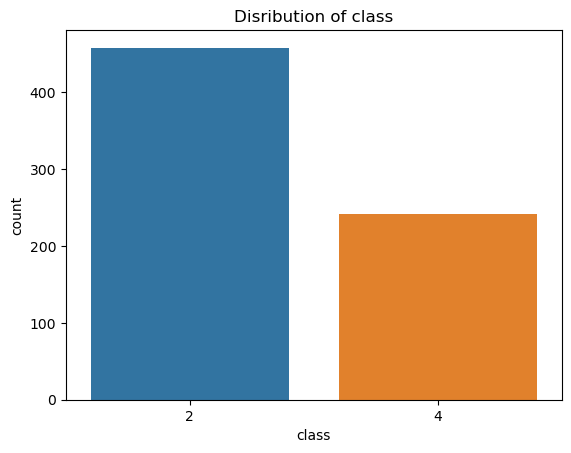

In [34]:
# First, we check the distribution of the target variable
sns.countplot(x='class', data=df)
plt.title("Disribution of class")

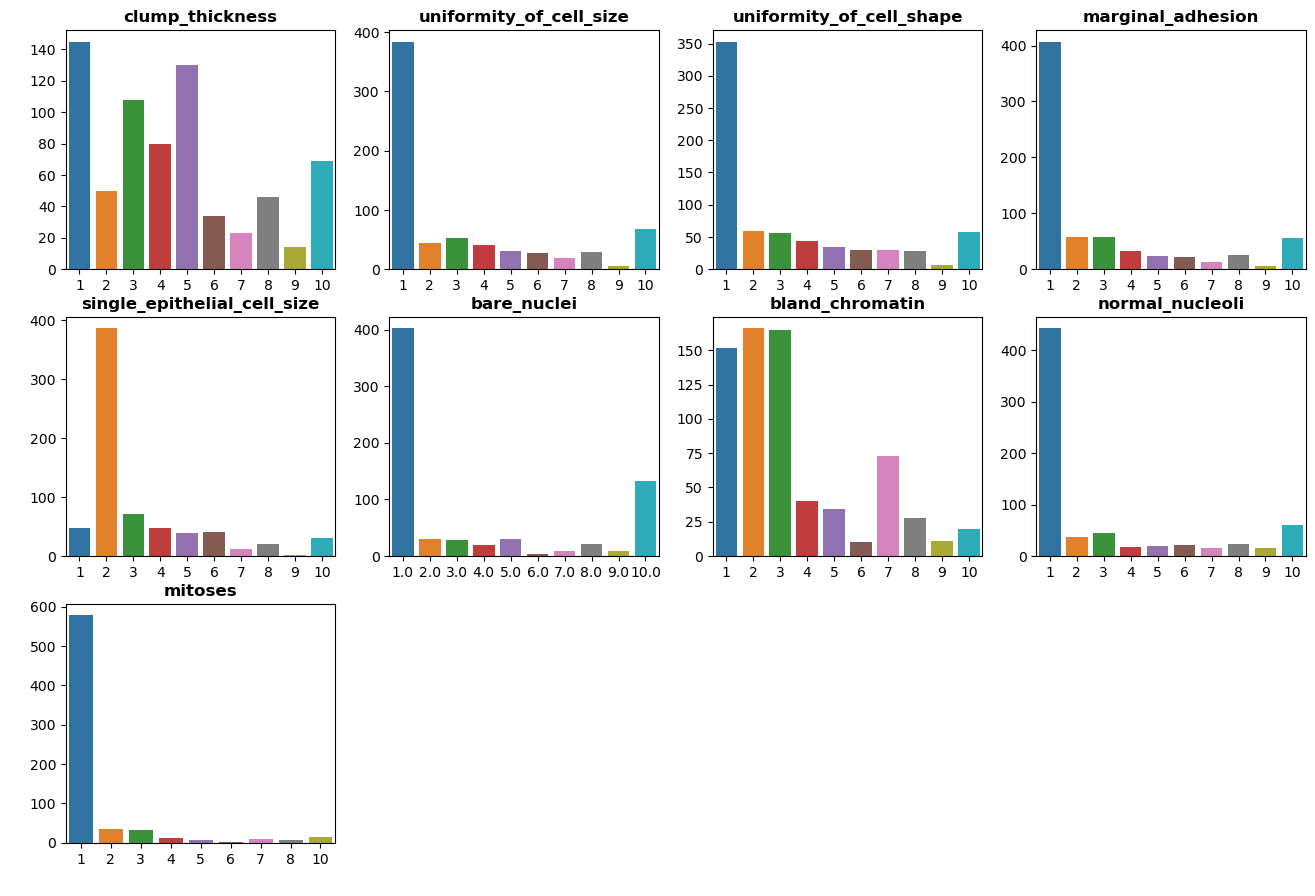

In [35]:
plt.figure(figsize= (16,18))
for i,col in enumerate(features):
    plt.subplot(5, 4, i+1)
    sns.countplot(x=col, data=df)
    plt.title(col, weight = 'bold')
    plt.ylabel(" ")
    plt.xlabel(" ")

<AxesSubplot:>

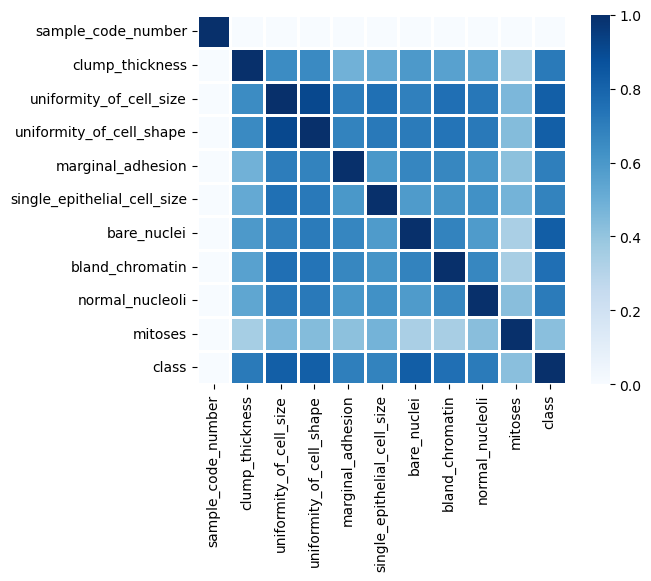

In [36]:
corr = df.corr()
sns.heatmap(corr, vmin=0, vmax=1, linewidths=2, square=True, cmap='Blues')

## Base model

Notice that bare nuclei has missing values and we need to impute them.

In [37]:
binary_class = {2:0, 4:1}

df["binary_class"] = df["class"].map(binary_class)

In [38]:
X = df[features]
y = df['binary_class']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [40]:
imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)

/Users/lilianabadillo/opt/anaconda3/envs/kaggle/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [41]:
lr = LogisticRegression()

In [42]:
lr.fit(X_train, y_train)

LogisticRegression()

In [43]:
X_test = imputer.transform(X_test)
y_predict = lr.predict(X_test)

In [45]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        93
           1       0.96      0.98      0.97        47

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [48]:
print(confusion_matrix(y_test, y_predict))

[[91  2]
 [ 1 46]]


In [47]:
print(recall_score(y_test, y_predict))

0.9787234042553191
